In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## NLP
import spacy
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora

spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 3]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

def word_Cloud_plot(tokenized_text,background):
    all_words = ' '.join([text for text in tokenized_text])
    wc = WordCloud(width=800,height = 500,random_state = 21,background_color=background, max_font_size = 100,max_words=50,
                    stopwords=STOPWORDS,contour_width=3, contour_color='steelblue')
    wc.generate(all_words)
    plt.figure(figsize = (10,7))
    plt.imshow(wc,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

def word_Hist(tokenized_text):
    a = nltk.FreqDist(tokenized_text)
    d = pd.DataFrame({"Wordtag": list(a.keys()),"Count": list(a.values())})
    d = d.nlargest(columns = "Count", n = 10)
    plt.figure(figsize = (10,5))
    ax = sns.barplot(data = d, x = "Wordtag", y = 'Count')
    ax.set(ylabel = 'Count')
    plt.show()
    
def get_Topic(text_data,NUM_TOPICS,topic_words):
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=topic_words)
    for topic in topics:
        print(topic)
def get_Sentiment(df,name):  
    sid = SentimentIntensityAnalyzer()
    df['sentiment_nltk'] = [sid.polarity_scores(i).get('compound') for i in df[name]]
    lst = []
    for i in range(len(df['sentiment_nltk'])):
        if df['sentiment_nltk'][i] >= 0:
            lst.append('Positive')
        elif df['sentiment_nltk'][i]< 0:
            lst.append('Negative')
  
    df['sentiment'] = lst
def pie_Percentage_Plot(df,feature,title): 
    lst = list(df[feature])

    dic = {}
    for key in lst:
        dic[key] = dic.get(key, 0) + 1
    labels = list(dic.keys())
    sizes = list(dic.values())
    

    
    fig = plt.figure(figsize = (16,12))
    ax1 = fig.add_subplot(2,2,1)


    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal') 
    ax1.set_title(title, fontsize = 15)
    


    plt.show()

In [2]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def get_pie_chart(df,title):
    labels = df.index[:-1]
    sizes = df['Frequency'].to_list()[:-1]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
             startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title, fontsize = 15)

    plt.show()

In [3]:
df = pd.read_csv('Post-NatCon 2021 Survey.csv',encoding='latin-1')

df.head()

,DistributionChannel,UserLanguage,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,...,Q20_11_TEXT,Q22,Q26,Q24,Q27,Q28_1,Q28_2,Q28_3,Q29.1,Q30
0,anonymous,EN,Good,Good,Good,Good,Good,Good,Good,Good,...,NaN,NaN,Veteran,Air Force,Yes,Joseph,Castellanos,castej7@unlv.nevada.edu,NaN,NaN
1,anonymous,EN,Good,Good,Good,Good,Excellent,Good,NaN,Good,...,NaN,Civilian Supporter,NaN,NaN,Yes,Jennifer,Coffey,coffeyjd1@appstate.edu,The flexibility of access was nice. I also ap...,Limiting how often the sponsors blow up the ch...
2,anonymous,EN,Excellent,Excellent,Excellent,Excellent,NaN,Excellent,NaN,Excellent,...,SVA Regional Director,Active duty (non-reservist),Veteran,Army,Yes,Marie,Doty,marie.doty@icc.edu,I was very pleased to hear the information giv...,NaN
3,anonymous,EN,Excellent,Average,Fair,Good,Fair,Poor,NaN,Good,...,NaN,Civilian Supporter,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,anonymous,EN,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,NaN,Excellent,...,NaN,Active duty (non-reservist),Veteran,Navy,Yes,Vincent,Wainwright,vince@scalesg.com,NaN,NaN


#### Q2 Please rate your conference experience on the following items: 

In [50]:
## Online Registration

df_ = df['Q2_5'].dropna().reset_index()['Q2_5']
dict_key = ['Excellent','Good','Average','Fair','Poor']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
print(dic_)             

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

{'Excellent': [86, 0], 'Good': [66, 0], 'Average': [23, 0], 'Fair': [20, 0], 'Poor': [10, 0]}


,Frequency,Percentage
Excellent,86,41.95%
Good,66,32.20%
Average,23,11.22%
Fair,20,9.76%
Poor,10,4.88%
Total,205,100.00%


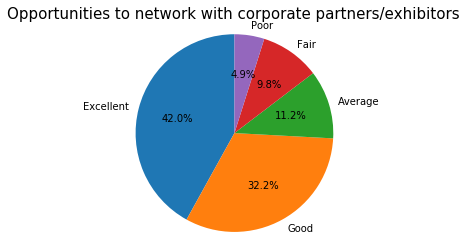

In [51]:
get_pie_chart(dic_df ,'Opportunities to network with corporate partners/exhibitors')

{'Excellent': [154, '70.00%'],
 'Good': [51, '23.18%'],
 'Average': [6, '2.73%'],
 'Fair': [7, '3.18%'],
 'Poor': [2, '0.91%'],
 'Total': [220, '100.00%']}

In [71]:
## Please rate your experience with the Online Conference Platform on the following items:

df_ = df['Q3_7'].dropna().reset_index()['Q3_7']
dict_key = ['Excellent','Good','Average','Fair','Poor']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Excellent,87,50.29%
Good,49,28.32%
Average,22,12.72%
Fair,10,5.78%
Poor,5,2.89%
Total,173,100.00%


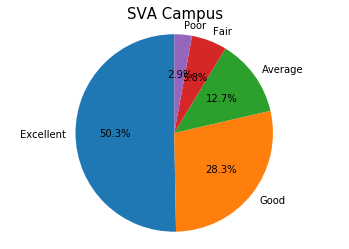

In [72]:
get_pie_chart(dic_df ,'SVA Campus')

In [82]:
## Please rate your experience with the Breakout Sessions on the following items:

df_ = df['Q16_5'].dropna().reset_index()['Q16_5']
dict_key = ['Excellent','Good','Average','Fair','Poor']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Excellent,82,42.93%
Good,57,29.84%
Average,30,15.71%
Fair,10,5.24%
Poor,12,6.28%
Total,191,100.00%


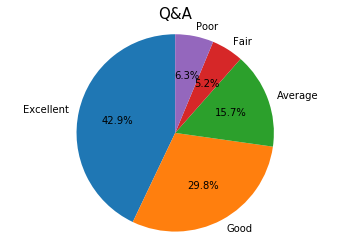

In [83]:
get_pie_chart(dic_df ,'Q&A')

In [ ]:
# Q4 What breakouts, topics, or speakers would you recommend for next year’s national conference?

## 研究怎么提取关键信息


In [84]:
## Q5 Was NatCon 2021 a learning experience for you and your chapter?

df_ = df['Q5'].dropna().reset_index()['Q5']
dict_key = ['Yes','No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
Yes,194,88.18%
No,26,11.82%
Total,220,100.00%


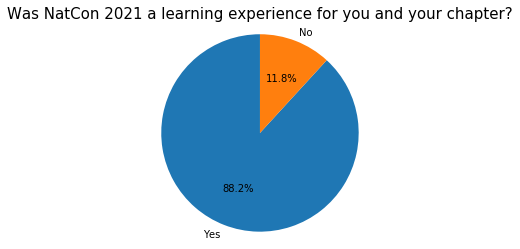

In [85]:
get_pie_chart(dic_df ,'Was NatCon 2021 a learning experience for you and your chapter?')

In [94]:
## Q8 While at NatCon 2021, did you connect with:

df_ = df['Q8_4'].dropna().reset_index()['Q8_4']
dict_key = ['Yes','No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 


,Frequency,Percentage
Yes,129,61.14%
No,82,38.86%
Total,211,100.00%


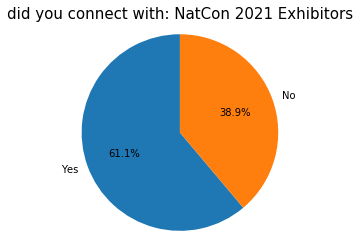

In [95]:
get_pie_chart(dic_df ,'did you connect with: NatCon 2021 Exhibitors')

In [96]:
## Q9 What are your chapter priorities for 2022? (check all that apply)

df_ = df['Q9'].dropna().reset_index()['Q9']
dict_key = ['Chapter recruitment','Chapter engagement','Training new chapter leaders','Fundraising']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 


,Frequency,Percentage
Chapter recruitment,82,25.08%
Chapter engagement,130,39.76%
Training new chapter leaders,65,19.88%
Fundraising,50,15.29%
Total,327,100.00%


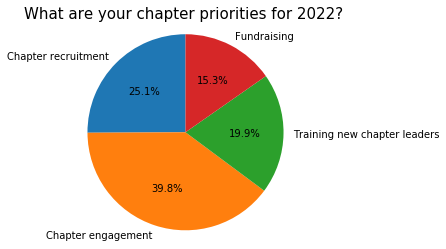

In [97]:
get_pie_chart(dic_df ,'What are your chapter priorities for 2022? ')

In [98]:
df_ = df['Q29'].dropna().reset_index()['Q29']
dict_key = ['Yes','No']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 


,Frequency,Percentage
Yes,32,22.54%
No,110,77.46%
Total,142,100.00%


In [100]:
#10 Please select the previous SVA NatCons you attended (check all that apply)?

df_ = df['Q10'].dropna().reset_index()['Q10']
dict_key = [
    
    '2008 (Chicago, IL)',
    '2009 (San Francisco, CA)',
    '2010 (Washington, DC)',
    '2011 (Las Vegas, NV)',
    '2013 (Orlando, FL)',
    '2014 (Scottsdale, AZ)',
    '2015 (San Antonio, TX)',
    '2016 (Orlando, FL)',
    '2017 (Anaheim, CA)',
    '2018 (San Antonio, TX)',
    '2019 (Orlando, FL)',
    '2020 (Los Angeles, CA)',
    'None of the above / 2021 (Virtual Conference) was my first NatCon'


]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df 

,Frequency,Percentage
"2008 (Chicago, IL)",0,0.00%
"2009 (San Francisco, CA)",1,0.68%
"2010 (Washington, DC)",3,2.05%
"2011 (Las Vegas, NV)",0,0.00%
"2013 (Orlando, FL)",2,1.37%
"2014 (Scottsdale, AZ)",2,1.37%
"2015 (San Antonio, TX)",3,2.05%
"2016 (Orlando, FL)",7,4.79%
"2017 (Anaheim, CA)",8,5.48%
"2018 (San Antonio, TX)",12,8.22%


In [101]:
#Q11 How would you rate this year's national conference to previous national conferences that you attended?

df_ = df['Q11'].dropna().reset_index()['Q11']
dict_key = ['Extremely Better','Somewhat Better','Slightly Better','Same, No Difference','Slightly Worse','Somewhat Worse','Extremely Worse']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  


,Frequency,Percentage
Extremely Better,15,22.06%
Somewhat Better,6,8.82%
Slightly Better,3,4.41%
"Same, No Difference",17,25.00%
Slightly Worse,15,22.06%
Somewhat Worse,8,11.76%
Extremely Worse,4,5.88%
Total,68,100.00%


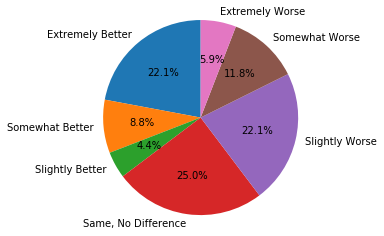

In [102]:
get_pie_chart(dic_df ,'')

In [7]:
set(df_age)

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 58.0,
 60.0,
 61.0,
 62.0,
 66.0,
 67.0,
 69.0,
 71.0,
 74.0}

In [9]:
df_age = df['Q18'].dropna().reset_index()['Q18']

count = 0
dic_age = {"Under 25":[0,0], "25 or Older":[0,0]}

for i in range(len(df_age)):
    if df_age[i] == '86 or older':
        dic_age["25 or Older"][0] += 1
        count += 1
    elif int(df_age[i]) >= 25:
        dic_age["25 or Older"][0] += 1 
        count += 1
    else:
        dic_age["Under 25"][0] += 1
        count += 1
dic_age["Under 25"][1] = "{:.2%}".format(dic_age["Under 25"][0]/count)
dic_age["25 or Older"][1] = "{:.2%}".format(dic_age["25 or Older"][0]/count)
dic_age['Total'] = [count,"100.00%"]
dic_df =  pd.DataFrame(dic_age,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
Under 25,9,4.29%
25 or Older,201,95.71%
Total,210,100.00%


In [10]:
df_age = df['Q18'].dropna().reset_index()['Q18']
dict_key = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70 and Over"]
dic_age = {}
count = 0

for i in range(len(dict_key)):
    dic_age[dict_key[i]] = [0,0]
dic_age

for i in range(len(df_age)):
    if df_age[i] == '86 or older':
        dic_age["70 and Over"][0] += 1
        count += 1
    elif int(df_age[i]) < 25:
        dic_age["18-24"][0] += 1 
        count += 1
    elif int(df_age[i]) < 30:
        dic_age["25-29"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 35:
        dic_age["30-34"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 40:
        dic_age["35-39"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 45:
        dic_age["40-44"][0] += 1 
        count += 1
    elif int(df_age[i]) < 50:
        dic_age["45-49"][0] += 1 
        count += 1
    elif int(df_age[i]) < 55:
        dic_age["50-54"][0] += 1 
        count += 1
    
    elif int(df_age[i]) < 60:
        dic_age["55-59"][0] += 1 
        count += 1
    elif int(df_age[i]) < 65:
        dic_age["60-64"][0] += 1 
        count += 1
    elif int(df_age[i]) < 70:
        dic_age["65-69"][0] += 1 
        count += 1
    else:
        dic_age["70 and Over"][0] += 1
        count += 1
        
for i in range(len(dict_key)):
    dic_age[dict_key[i]][1] = "{:.2%}".format(dic_age[dict_key[i]][0]/count)
dic_age['Total'] = [count,"100.00%"]        
        
dic_df =  pd.DataFrame(dic_age,index=['Frequency','Percentage']).T

dic_df

,Frequency,Percentage
18-24,9,4.29%
25-29,33,15.71%
30-34,32,15.24%
35-39,40,19.05%
40-44,29,13.81%
45-49,25,11.90%
50-54,20,9.52%
55-59,8,3.81%
60-64,8,3.81%
65-69,4,1.90%


In [20]:
##

df_ = df['Q13_1'].dropna().reset_index()['Q13_1']
dict_key = ['Extremely likely','Somewhat likely','Neither likely nor unlikely','Somewhat unlikely','Extremely unlikely']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  


,Frequency,Percentage
Extremely likely,146,67.28%
Somewhat likely,48,22.12%
Neither likely nor unlikely,12,5.53%
Somewhat unlikely,5,2.30%
Extremely unlikely,6,2.76%
Total,217,100.00%


In [16]:
df_ = df['Q19'].dropna().reset_index()['Q19']
df_

0          Male/Man 
1      Female/Woman 
2      Female/Woman 
3      Female/Woman 
4          Male/Man 
           ...      
209        Male/Man 
210    Female/Woman 
211        Male/Man 
212    Female/Woman 
213        Male/Man 
Name: Q19, Length: 214, dtype: object

In [ ]:
df_ = df['Q13_1'].dropna().reset_index()['Q13_1']
dict_key = ['Extremely likely','Somewhat likely','Neither likely nor unlikely','Somewhat unlikely','Extremely unlikely']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

In [23]:
df_ = df['Q19'].dropna().reset_index()['Q19']
dict_key = ["Male","Female"]
dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]


for i in range(len(df_)):
    if df_[i] == 'Male/Man ':
        dic_["Male"][0] += 1
        count += 1
        #print(1)
    elif df_[i] == "Female/Woman ":
        dic_["Female"][0] += 1 
        count += 1
    #print(count)
for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
    


dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df


,Frequency,Percentage
Male,119,57.49%
Female,88,42.51%
Total,207,100.00%


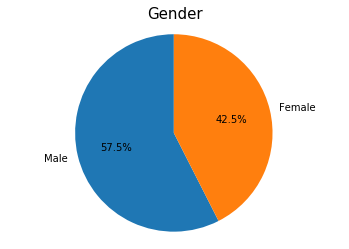

In [25]:
get_pie_chart(dic_df ,'Gender')

In [28]:
##

df_ = df['Q20'].dropna().reset_index()['Q20']
dict_key = ['Student Veteran','Student Civilian','School Representative (staff, professor, administrator)','SVA Chapter Advisor',
     'VA Certifying Official','Exhibitor/Sponsor','VSO Representative','Student Veteran Alumni','Federal / State Employee','General Attendee','Other:'
    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  


,Frequency,Percentage
Student Veteran,184,62.59%
Student Civilian,3,1.02%
"School Representative (staff, professor, administrator)",20,6.80%
SVA Chapter Advisor,18,6.12%
VA Certifying Official,8,2.72%
Exhibitor/Sponsor,2,0.68%
VSO Representative,4,1.36%
Student Veteran Alumni,24,8.16%
Federal / State Employee,9,3.06%
General Attendee,11,3.74%


In [ ]:
##

df_ = df['Q20'].dropna().reset_index()['Q20']
dict_key = ['Student Veteran','Student Civilian','School Representative (staff, professor, administrator)','SVA Chapter Advisor',
     'VA Certifying Official','Exhibitor/Sponsor','VSO Representative','Student Veteran Alumni','Federal / State Employee','General Attendee','Other:'
    ]

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

In [33]:
set(df['Q24'].dropna().reset_index()['Q24'])

{'Air Force', 'Army', 'Coast Guard', 'Marine Corps', 'Navy'}

In [35]:

df_ = df['Q24'].dropna().reset_index()['Q24']
dict_key = ['Air Force', 'Army', 'Coast Guard', 'Marine Corps', 'Navy']

dic_ = {}
count = 0

for i in range(len(dict_key)):
    dic_[dict_key[i]] = [0,0]

for i in range(len(df_)):      
    for j in range(len(dict_key)):
        if dict_key[j] in df_[i]:
            dic_[dict_key[j]][0] += 1
            count += 1
              

for i in range(len(dict_key)):
    dic_[dict_key[i]][1] = "{:.2%}".format(dic_[dict_key[i]][0]/count)
dic_['Total'] = [count,"100.00%"] 
        
dic_df =  pd.DataFrame(dic_,index=['Frequency','Percentage']).T

dic_df  

,Frequency,Percentage
Air Force,20,10.20%
Army,99,50.51%
Coast Guard,6,3.06%
Marine Corps,25,12.76%
Navy,46,23.47%
Total,196,100.00%


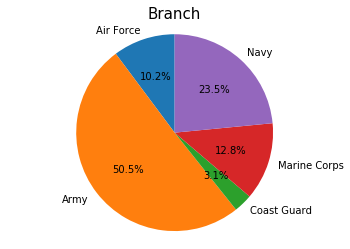

In [36]:
get_pie_chart(dic_df ,'Branch')

In [4]:


text_data = []
text = df['Q30'].dropna().reset_index()['Q30']

for i in range(len(text)):
    tokens = prepare_text_for_lda(text[i])
    text_data.append(tokens)
text_list = [j for sub in text_data for j in sub]
word_Cloud_plot(text_list,'white')

NameError: name 'text' is not defined

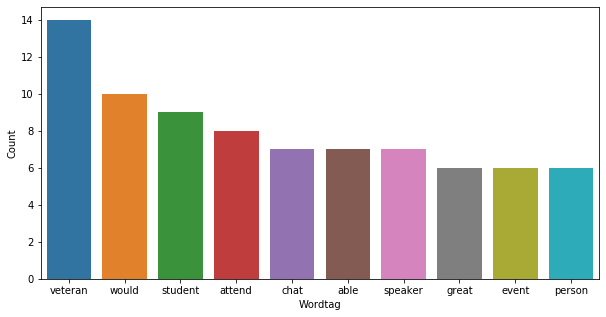

In [7]:
word_Hist(text_list)

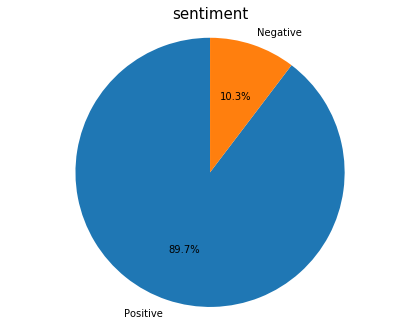

In [66]:
df_text = df[['Q30']].dropna().iloc[2:].reset_index()


get_Sentiment(df_text,'Q30')

pie_Percentage_Plot(df_text,'sentiment','sentiment')

In [67]:
Positive_list = df_text[df_text['sentiment'] == 'Positive']['Q30'].tolist()
Positive_list

['totally ',
 'please provide more time for Q&A',
 'Excellent NatCon. I want SVAHQ to feel confident that they put out an excellent product. ',
 'NatCon was great. I wish my first experience was in-person. I wish to join the SAV Chapter on my campus, Mercer University Georgia. ',
 'I would like to see more companies/organizations related to counseling/mental health.',
 'Thank you to the SVA staff for working hard to make the NatCon experience as fun and informative as possible!\n\nThe SVA facemask is a little tight on my face (I have a big face, I guess), so maybe a redesign with adjustable straps or something.',
 'Show more diversity.\nMore collaboration between student Veterans and non student veterans in numerous areas like business, job development etc',
 'You all set the bar for virtual conferences with this one. Obviously in-person events lend themselves much better to networking and camaraderie, but we made the most out of this one. Well done!',
 'More interaction and programmin

In [68]:
Negative_list = df_text[df_text['sentiment'] == 'Negative']['Q30'].tolist()
Negative_list

['Since I have to work during the day, it was difficult to log into live events to ask questions',
 'There was almost no valuable correspondence before the event - all hype, no substance. Exhibitors were holding individual info sessions, yet there was no information about those - many of which sounded significantly more interesting than the breakout topics. The exhibitor booths were not "manned," instead you had to go through some weird portal to get to them. The diversity of exhibitors was garbage. I met far more grad students than undergrads, yet there was nothing for grad students except MSW students. I also exhausted by VA Education benefits a long time ago; there was nothing for people like me. The "My Agenda" feature allowed me to add events then not be able to access them later - it was completely worthless.\n\nTo be completely honest, if I had paid for this, I would be pissed. I will never attend another NatCon, nor will I recommend it to our chapter\'s members. The whole thing